In [1]:
library(IRdisplay)

In [2]:
display_html("<h1><font color=red>ANALISE DE DADOS PNAD 2019</h1>")
display_html("<h2>Relacao entre renda, genero e raca no ano de 2019</h2>")

ANALISE DE DADOS PNAD 2019

Relacao entre renda, genero e raca no ano de 2019

In [3]:
display_html("<h2>Biblioteca PNADcIBGE</h2>")


Biblioteca PNADcIBGE

In [4]:
# Instalação do Pacote Pnad
install.packages("PNADcIBGE")


  There is a binary version available but the source version is later:
          binary source needs_compilation
PNADcIBGE  0.4.0  0.6.0             FALSE



installing the source package ‘PNADcIBGE’




In [5]:
library(PNADcIBGE)
library(ggplot2)
library(dplyr)
library(psych)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




In [6]:
### importando dados brutos do Pnad para um Data-Frame, 1 trimestre de 2020
pnad = get_pnadc(year = 2019, design = FALSE, interview = 1)

Warning message in get_pnadc(year = 2019, design = FALSE, interview = 1):
“Deflator year was not provided, so deflator year was set to 2019.”


In [7]:
display_html("<h2>Estrutura dos dados do Data Frame Pnad</h2></n><h3>443.790 Observacoes e <br> 285 colunas</h3>")

str(pnad)

Estrutura dos dados do Data Frame Pnad 443.790 Observacoes e 285 colunas

tibble [443,790 × 285] (S3: tbl_df/tbl/data.frame)
 $ Ano      : chr [1:443790] "2019" "2019" "2019" "2019" ...
 $ Trimestre: chr [1:443790] "1" "1" "1" "1" ...
 $ UF       : Factor w/ 27 levels "Rondônia","Acre",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ Capital  : Factor w/ 27 levels "Município de Porto Velho (RO)",..: 2 2 2 2 2 NA 2 2 2 2 ...
 $ RM_RIDE  : Factor w/ 21 levels "Região Metropolitana de Manaus (AM)",..: NA NA NA NA NA NA NA NA NA NA ...
 $ UPA      : chr [1:443790] "120001207" "120001207" "120001207" "120001207" ...
 $ Estrato  : chr [1:443790] "1210010" "1210010" "1210010" "1210010" ...
 $ V1008    : chr [1:443790] "03" "08" "03" "08" ...
 $ V1014    : chr [1:443790] "07" "07" "07" "07" ...
 $ V1022    : Factor w/ 2 levels "Urbana","Rural": 1 1 1 1 1 2 2 1 1 2 ...
 $ V1023    : Factor w/ 4 levels "Capital","Resto da RM (Região Metropolitana, excluindo a capital)",..: 1 1 1 1 1 4 1 1 1 1 ...
 $ V1030    : num [1:443790] 407319 407319 407319 407319 407319 ...
 $ V1031    : num [1:4

In [8]:
head(pnad)

Ano,Trimestre,UF,Capital,RM_RIDE,UPA,Estrato,V1008,V1014,V1022,...,VD5008,VD5009,VD5010,VD5011,VD5012,CO1,CO1e,CO2,CO2e,CO3
<chr>,<chr>,<fct>,<fct>,<fct>,<chr>,<chr>,<chr>,<chr>,<fct>,...,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2019,1,Acre,Município de Rio Branco (AC),NA,120001207,1210010,03,07,Urbana,...,250,Mais de ¼ até ½ salário mínimo,1250,250,Mais de ¼ até ½ salário mínimo,1.012517,1.018645,1.012517,1.018645,1
2019,1,Acre,Município de Rio Branco (AC),NA,120001207,1210010,08,07,Urbana,...,800,Mais de ½ até 1 salário mínimo,1600,800,Mais de ½ até 1 salário mínimo,1.012517,1.018645,1.012517,1.018645,1
2019,1,Acre,Município de Rio Branco (AC),NA,120001207,1210010,03,07,Urbana,...,250,Mais de ¼ até ½ salário mínimo,1250,250,Mais de ¼ até ½ salário mínimo,1.012517,1.018645,1.012517,1.018645,1
2019,1,Acre,Município de Rio Branco (AC),NA,120001207,1210010,08,07,Urbana,...,800,Mais de ½ até 1 salário mínimo,1600,800,Mais de ½ até 1 salário mínimo,1.012517,1.018645,1.012517,1.018645,1
2019,1,Acre,Município de Rio Branco (AC),NA,120001207,1210010,07,07,Urbana,...,333,Mais de ¼ até ½ salário mínimo,1000,333,Mais de ¼ até ½ salário mínimo,1.012517,1.018645,1.012517,1.018645,1
2019,1,Acre,NA,NA,120002080,1250020,05,07,Rural,...,146,Até ¼ salário mínimo,730,146,Até ¼ salário mínimo,1.012517,1.018645,1.012517,1.018645,1


In [9]:
display_html("<h2>Descricao das colunas/variaveis de interesse :</h2>")
display_html("<h3>UF - Unidade da Federação</h3>")
display_html("<h3>V2007 - Sexo</h3>")
display_html("<h3>V2010 - Cor ou Raca</h3>")
display_html("<h3>VD4020 - Rendimento Mensal Efetivo</h3>")

Descricao das colunas/variaveis de interesse :

UF - Unidade da Federação

V2007 - Sexo

V2010 - Cor ou Raca

VD4020 - Rendimento Mensal Efetivo

In [10]:
dadosDF = pnad %>%
select(UF, V2007, V2010,VD4020)


In [11]:
summary(dadosDF)

              UF            V2007             V2010            VD4020      
 São Paulo     : 34495   Homem :216854   Branca  :170132   Min.   :     0  
 Minas Gerais  : 32733   Mulher:226936   Preta   : 39395   1st Qu.:   800  
 Rio de Janeiro: 31268                   Amarela :  2282   Median :  1240  
 Maranhão      : 30501                   Parda   :229587   Mean   :  2107  
 Santa Catarina: 26536                   Indígena:  2350   3rd Qu.:  2100  
 Paraná        : 23486                   Ignorado:    44   Max.   :300000  
 (Other)       :264771                                     NA's   :260715  

In [12]:
### quantidade de NAs elevada para remuneracao. desconsiderar as observacoes com NAs

In [13]:
display_html("<h2>Tratamento de Dados tais como renomear colunas e remover linhas com NAs</h2>")

Tratamento de Dados tais como renomear colunas e remover linhas com NAs

In [14]:
colnames(dadosDF) = c("UF", "GENERO", "RACA", "RENDIMENTO")

In [15]:
summary(dadosDF)
display_html("<h4>Os dados de rendimento estao com 260.715</h4>")

              UF            GENERO             RACA          RENDIMENTO    
 São Paulo     : 34495   Homem :216854   Branca  :170132   Min.   :     0  
 Minas Gerais  : 32733   Mulher:226936   Preta   : 39395   1st Qu.:   800  
 Rio de Janeiro: 31268                   Amarela :  2282   Median :  1240  
 Maranhão      : 30501                   Parda   :229587   Mean   :  2107  
 Santa Catarina: 26536                   Indígena:  2350   3rd Qu.:  2100  
 Paraná        : 23486                   Ignorado:    44   Max.   :300000  
 (Other)       :264771                                     NA's   :260715  

Os dados de rendimento estao com 260.715

In [16]:
display_html("<h3>Tabela Renomeada</h3>")
head(dadosDF)

Tabela Renomeada

UF,GENERO,RACA,RENDIMENTO
<fct>,<fct>,<fct>,<dbl>
Acre,Homem,Preta,100
Acre,Homem,Branca,NA
Acre,Homem,Preta,700
Acre,Mulher,Branca,3200
Acre,Mulher,Parda,NA
Acre,Mulher,Preta,NA


In [17]:
display_html("<h3>Estrutura e tipos de dados</h3>")
str(dadosDF)

Estrutura e tipos de dados

tibble [443,790 × 4] (S3: tbl_df/tbl/data.frame)
 $ UF        : Factor w/ 27 levels "Rondônia","Acre",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ GENERO    : Factor w/ 2 levels "Homem","Mulher": 1 1 1 2 2 2 1 1 1 1 ...
 $ RACA      : Factor w/ 6 levels "Branca","Preta",..: 2 1 2 1 4 2 2 4 4 2 ...
 $ RENDIMENTO: num [1:443790] 100 NA 700 3200 NA NA NA NA 10000 935 ...


In [18]:
dadosDF_clean = dadosDF %>%
select(UF, GENERO, RACA, RENDIMENTO)%>%
filter(is.na(RENDIMENTO)==FALSE)

In [19]:
display_html("<h2>Resumo com os dados de renda sem NAs</h2>")
summary(dadosDF_clean)

Resumo com os dados de renda sem NAs

                 UF            GENERO             RACA         RENDIMENTO    
 São Paulo        : 16632   Homem :107768   Branca  :75336   Min.   :     0  
 Minas Gerais     : 14967   Mulher: 75307   Preta   :18110   1st Qu.:   800  
 Rio de Janeiro   : 13662                   Amarela : 1064   Median :  1240  
 Santa Catarina   : 13043                   Parda   :87673   Mean   :  2107  
 Paraná           : 11045                   Indígena:  867   3rd Qu.:  2100  
 Rio Grande do Sul: 11003                   Ignorado:   25   Max.   :300000  
 (Other)          :102723                                                    

In [20]:
head(dadosDF_clean)

UF,GENERO,RACA,RENDIMENTO
<fct>,<fct>,<fct>,<dbl>
Acre,Homem,Preta,100
Acre,Homem,Preta,700
Acre,Mulher,Branca,3200
Acre,Homem,Parda,10000
Acre,Homem,Preta,935
Acre,Mulher,Branca,200


In [21]:
str(dadosDF_clean)

tibble [183,075 × 4] (S3: tbl_df/tbl/data.frame)
 $ UF        : Factor w/ 27 levels "Rondônia","Acre",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ GENERO    : Factor w/ 2 levels "Homem","Mulher": 1 1 2 1 1 2 1 1 1 2 ...
 $ RACA      : Factor w/ 6 levels "Branca","Preta",..: 2 2 1 4 2 1 4 1 4 4 ...
 $ RENDIMENTO: num [1:183075] 100 700 3200 10000 935 200 3000 800 998 4000 ...


In [22]:
display_html("<h2><font color=red>Informacoes Estatisticas da Distribuicao dos Rendimentos</h2>")

Informacoes Estatisticas da Distribuicao dos Rendimentos

In [23]:
display_html("<h3>Mean</h3>")
mean(dadosDF_clean$RENDIMENTO)

Mean

[1] 2106.582

In [24]:
display_html("<h3>Mediana</h3>")
median(dadosDF_clean$RENDIMENTO)

Mediana

[1] 1240

In [25]:
display_html("<h3>Variancia</h3>")
var(dadosDF_clean$RENDIMENTO)

Variancia

[1] 12864953

In [26]:
display_html("<h3>Desvio Padrao</h3>")
sd(dadosDF_clean$RENDIMENTO)

Desvio Padrao

[1] 3586.775

In [27]:
display_html("<h3>Valor Minimo</h3>")
min(dadosDF_clean$RENDIMENTO)

Valor Minimo

[1] 0

In [28]:
display_html("<h3>Valor Maximo</h3>")
max(dadosDF_clean$RENDIMENTO)

Valor Maximo

[1] 3e+05

In [29]:
display_html("<h3>Skewness</h3>")
skew(dadosDF_clean$RENDIMENTO)

Skewness

[1] 15.29704

In [30]:
display_html("<h3>Kurtosis</h3>")
kurtosi(dadosDF_clean$RENDIMENTO)

Kurtosis

[1] 674.8626

In [31]:
display_html("<h2>Quarters</h2>")
display_html("<h3>25% - 800 </h3>")
display_html("<h3>50% - 1.240 </h3>")
display_html("<h3>75% - 2.100 </h3>")
display_html("<h3>Valor Maximo 300.000 </h3>")

Quarters

25% - 800

50% - 1.240

75% - 2.100

Valor Maximo 300.000

In [32]:
#################

In [35]:
display_html("<h2><font color=red>REPRESENTACOES GRAFICAS</h2>")
library(repr)

REPRESENTACOES GRAFICAS

Rendimento Geral 2019

Warning message:
“Removed 3702 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


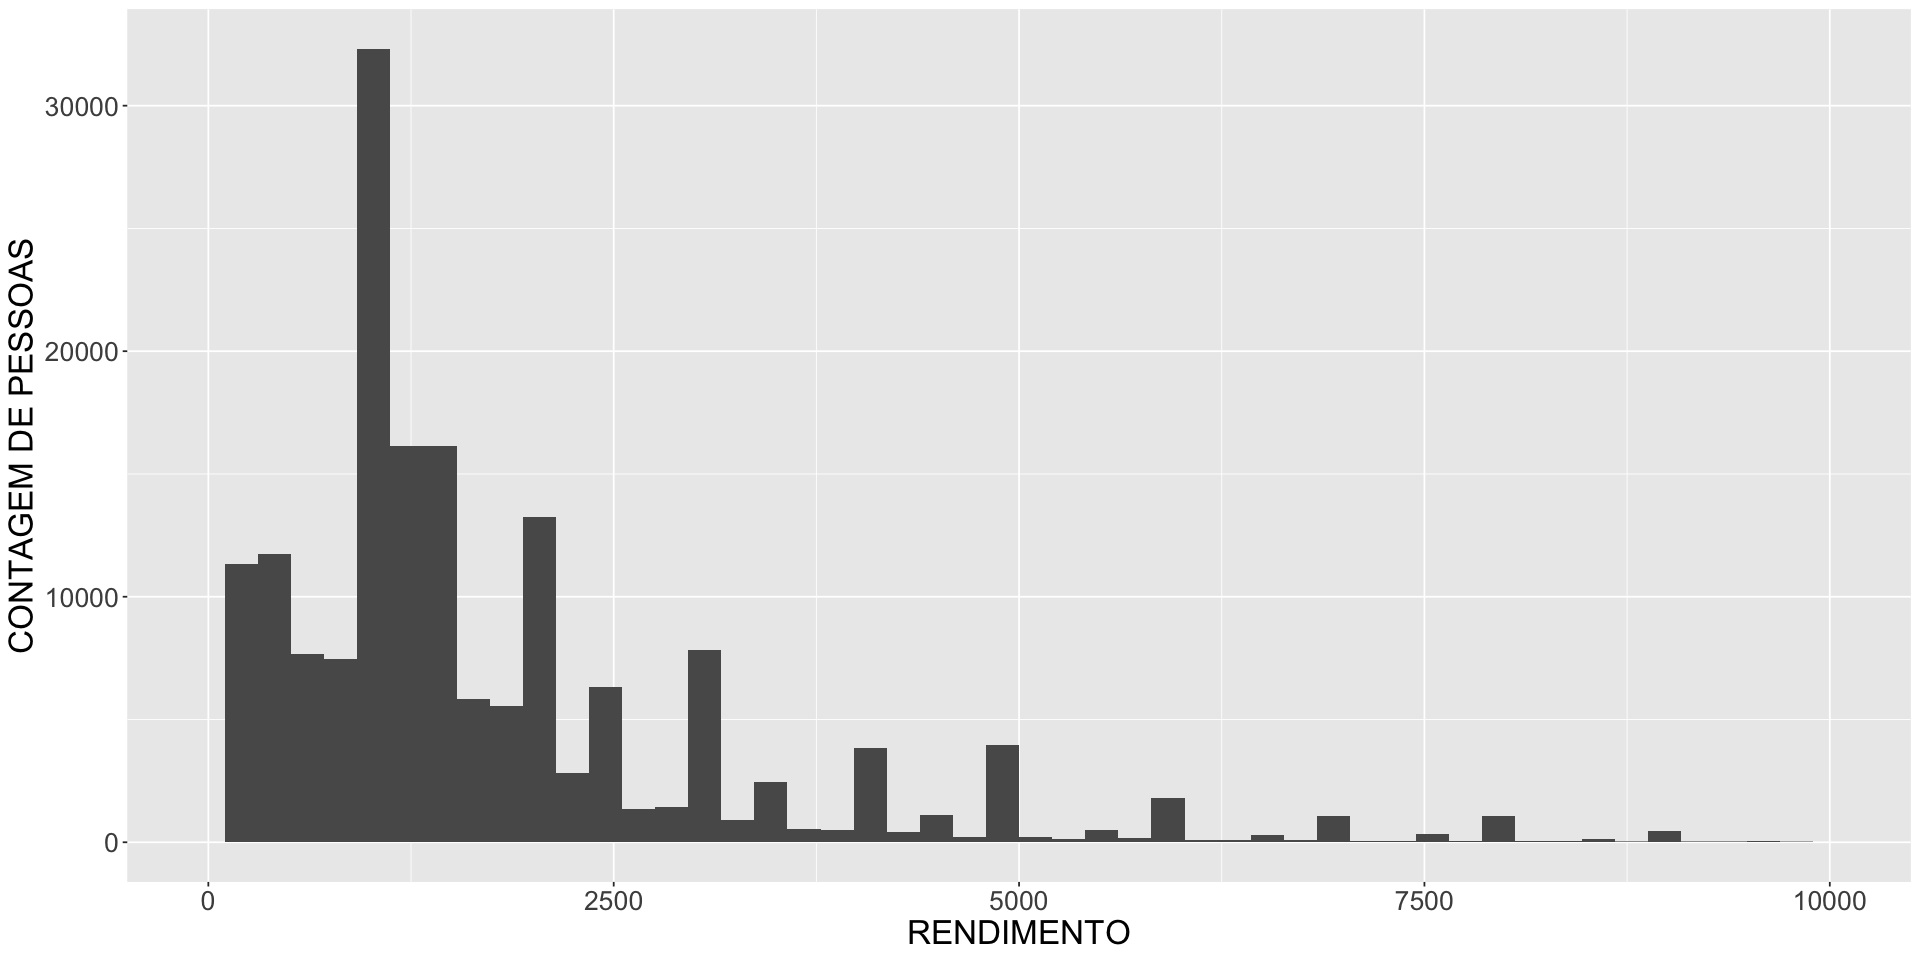

In [63]:
options(repr.plot.width=16, repr.plot.height=8)
display_html("<h3> Rendimento Geral 2019 </h3>")
ggplot(dadosDF_clean)+aes(RENDIMENTO)+geom_histogram(bins=50)+xlim(0,10000)+ylab("CONTAGEM DE PESSOAS") + 
theme(text = element_text(size = 20))

Quantidade de pessoas entrevistadas por Estado

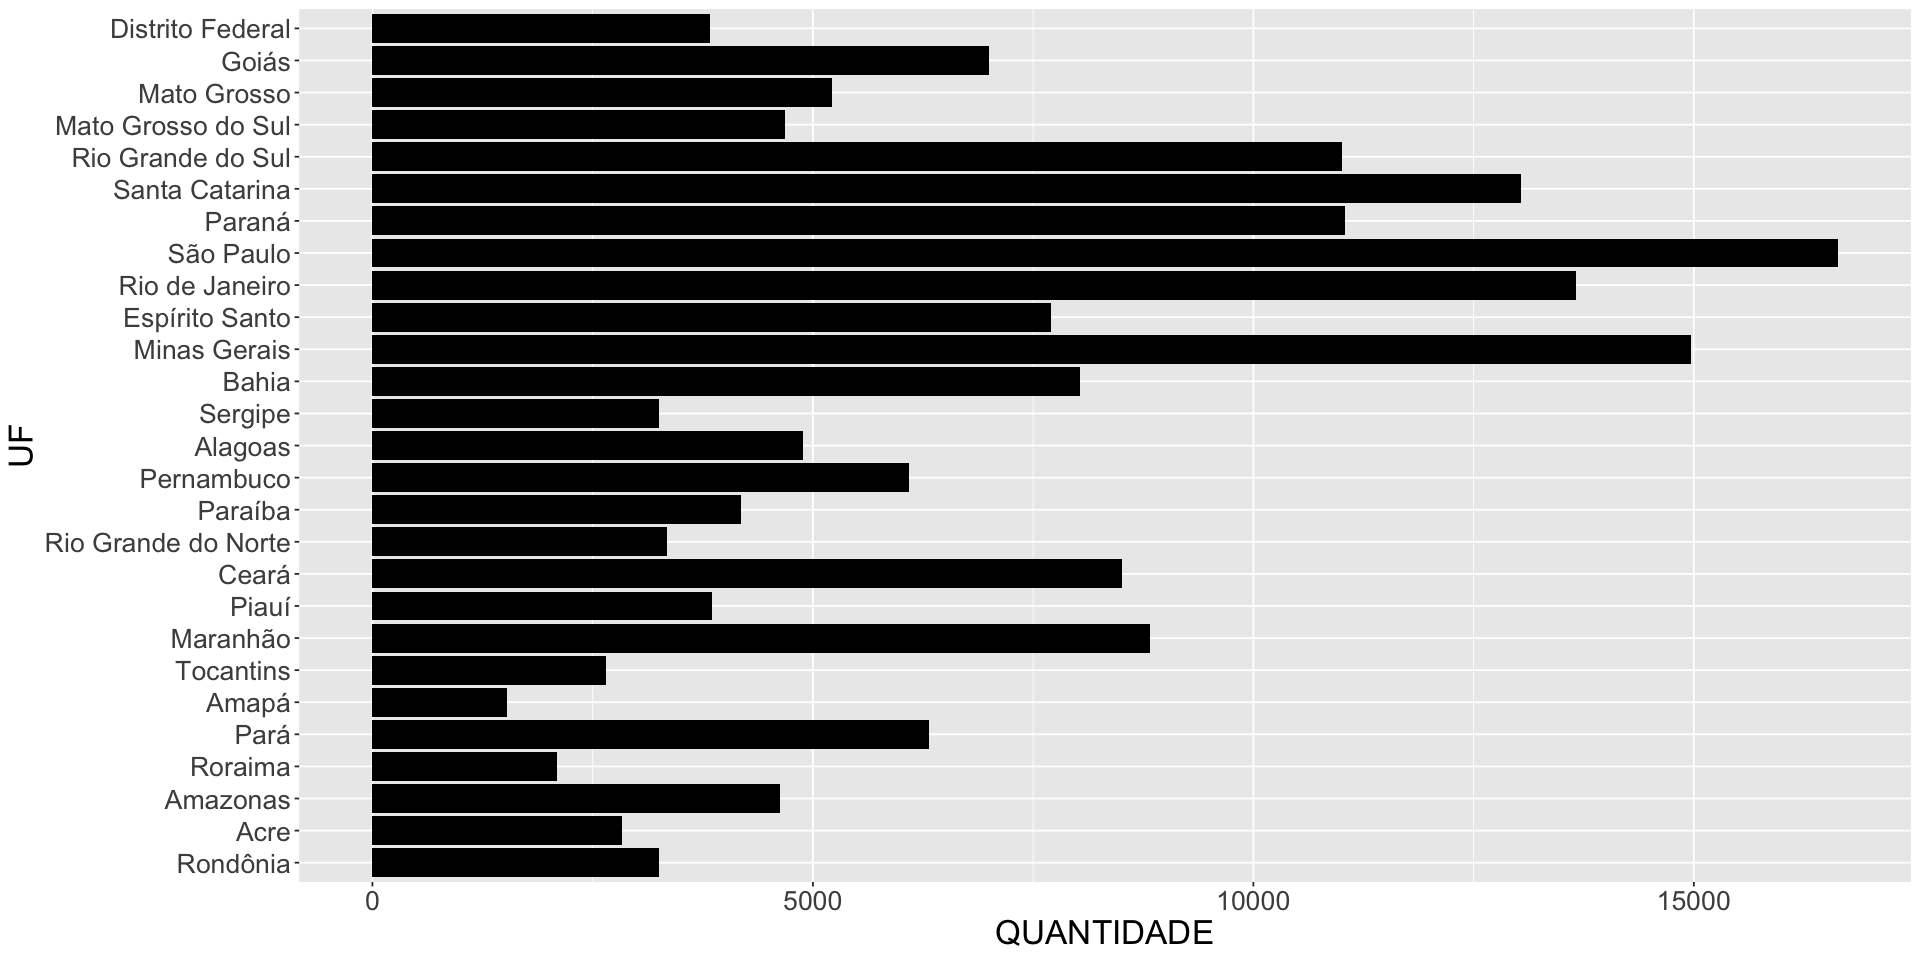

In [55]:
display_html("<h3> Quantidade de pessoas entrevistadas por Estado </h3>")
ggplot(dadosDF_clean)+aes(UF)+geom_bar(fill="black")+ylab("QUANTIDADE") + 
theme(text = element_text(size = 20)) + coord_flip()

Contagem de Pessoas por Genero

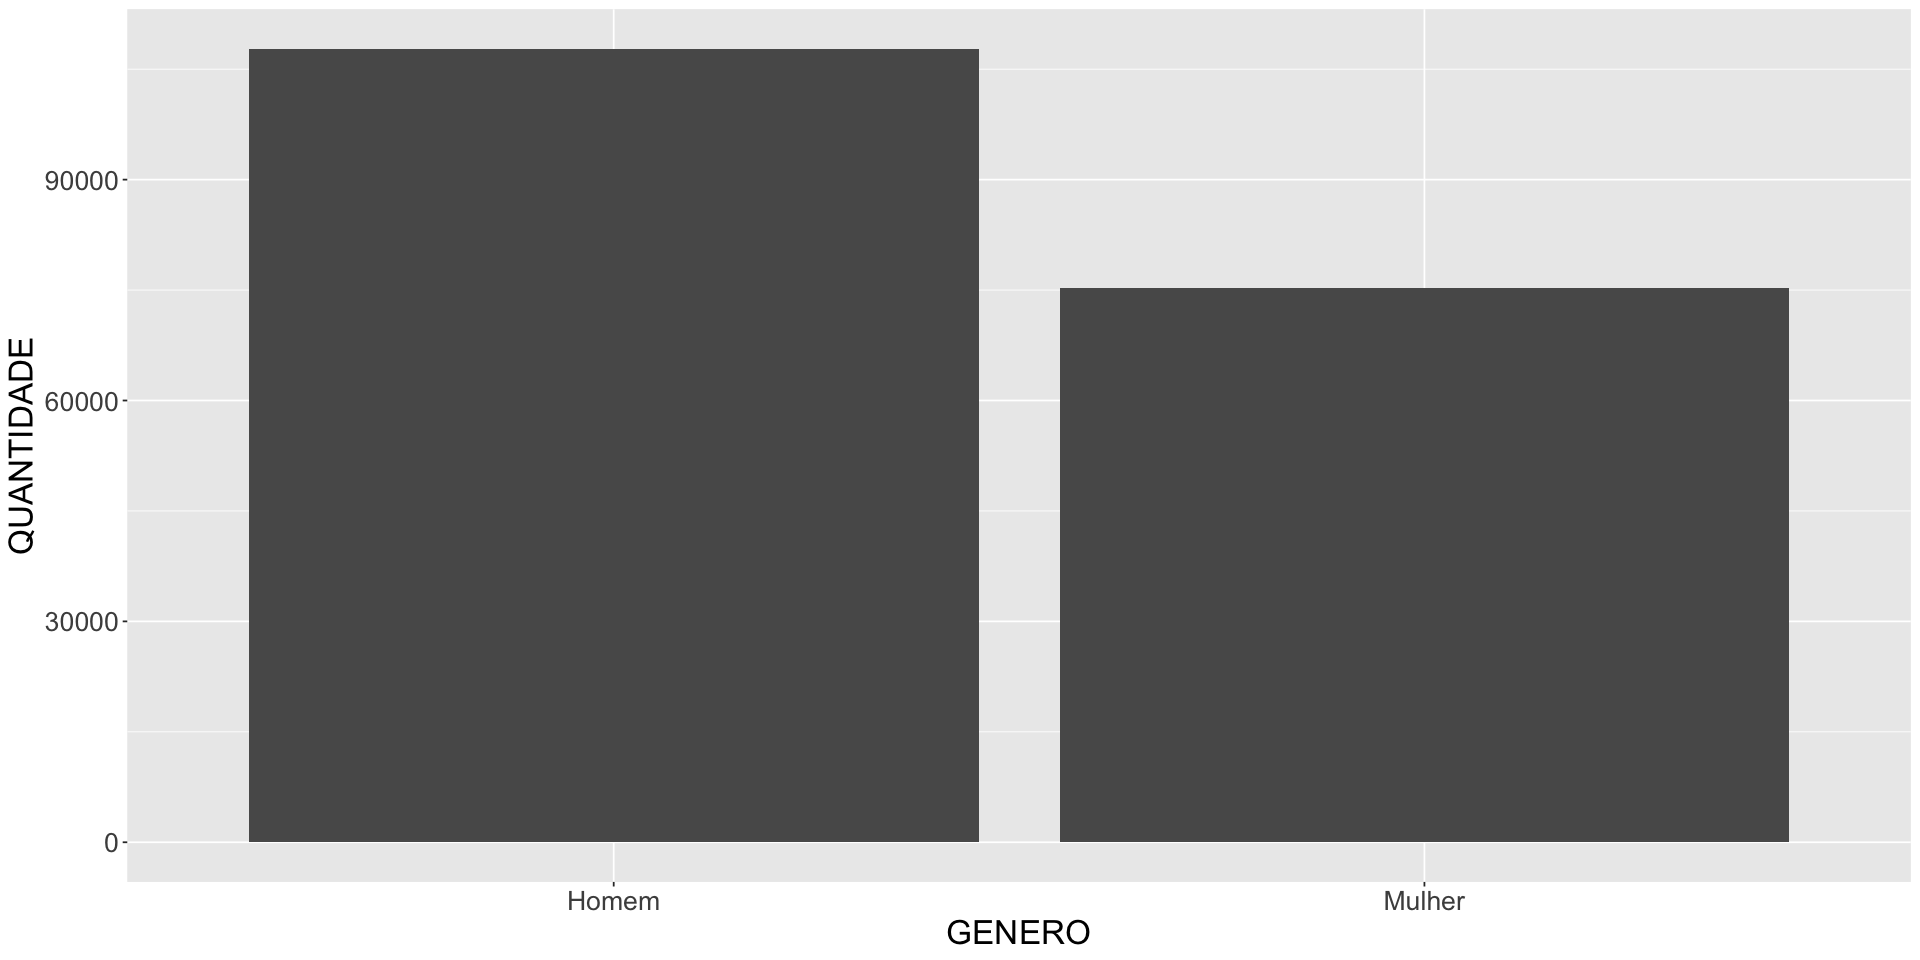

In [56]:
display_html("<h3> Contagem de Pessoas por Genero </h3>")
ggplot(dadosDF_clean)+aes(GENERO)+geom_bar()+ylab("QUANTIDADE") + 
theme(text = element_text(size = 20))

Contagem de Pessoas por Raca

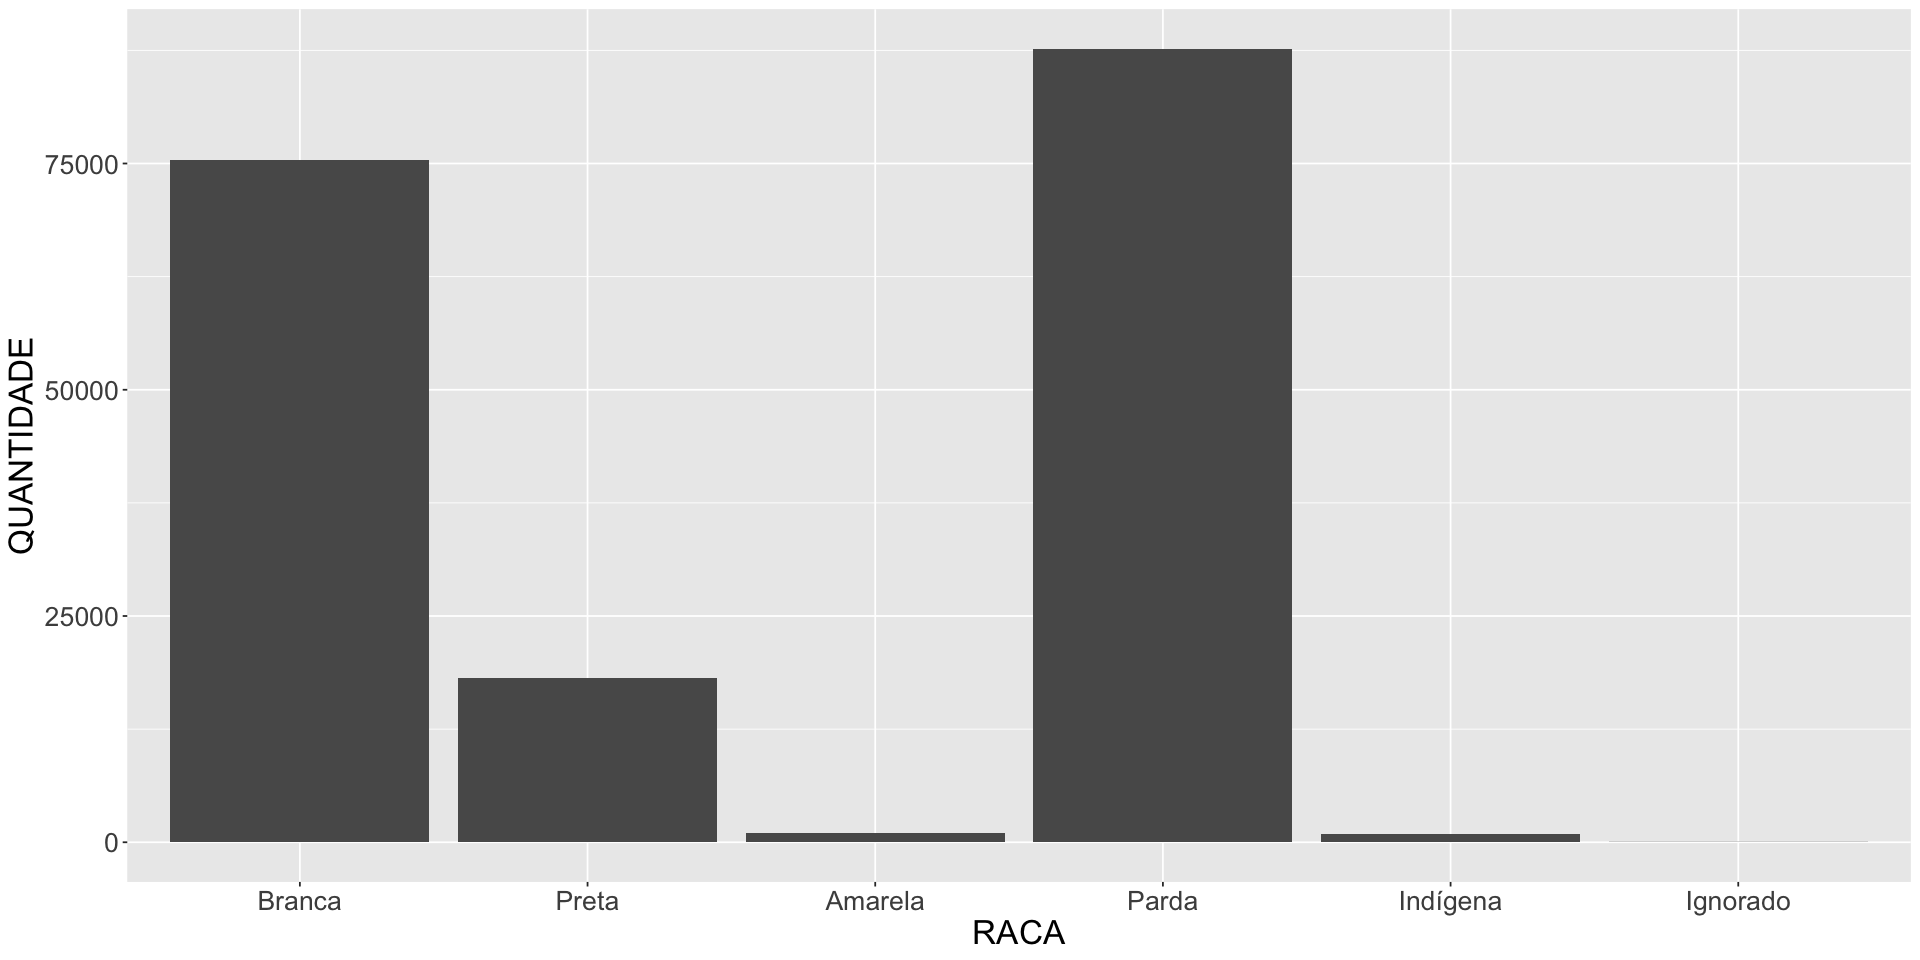

In [57]:
display_html("<h3> Contagem de Pessoas por Raca </h3>")
ggplot(dadosDF_clean)+aes(RACA)+geom_bar()+ylab("QUANTIDADE") + 
theme(text = element_text(size = 20))

Rendimentos por Raca

Warning message:
“Use of `dadosDF_clean$RACA` is discouraged. Use `RACA` instead.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 923 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 12 rows containing missing values (geom_bar).”


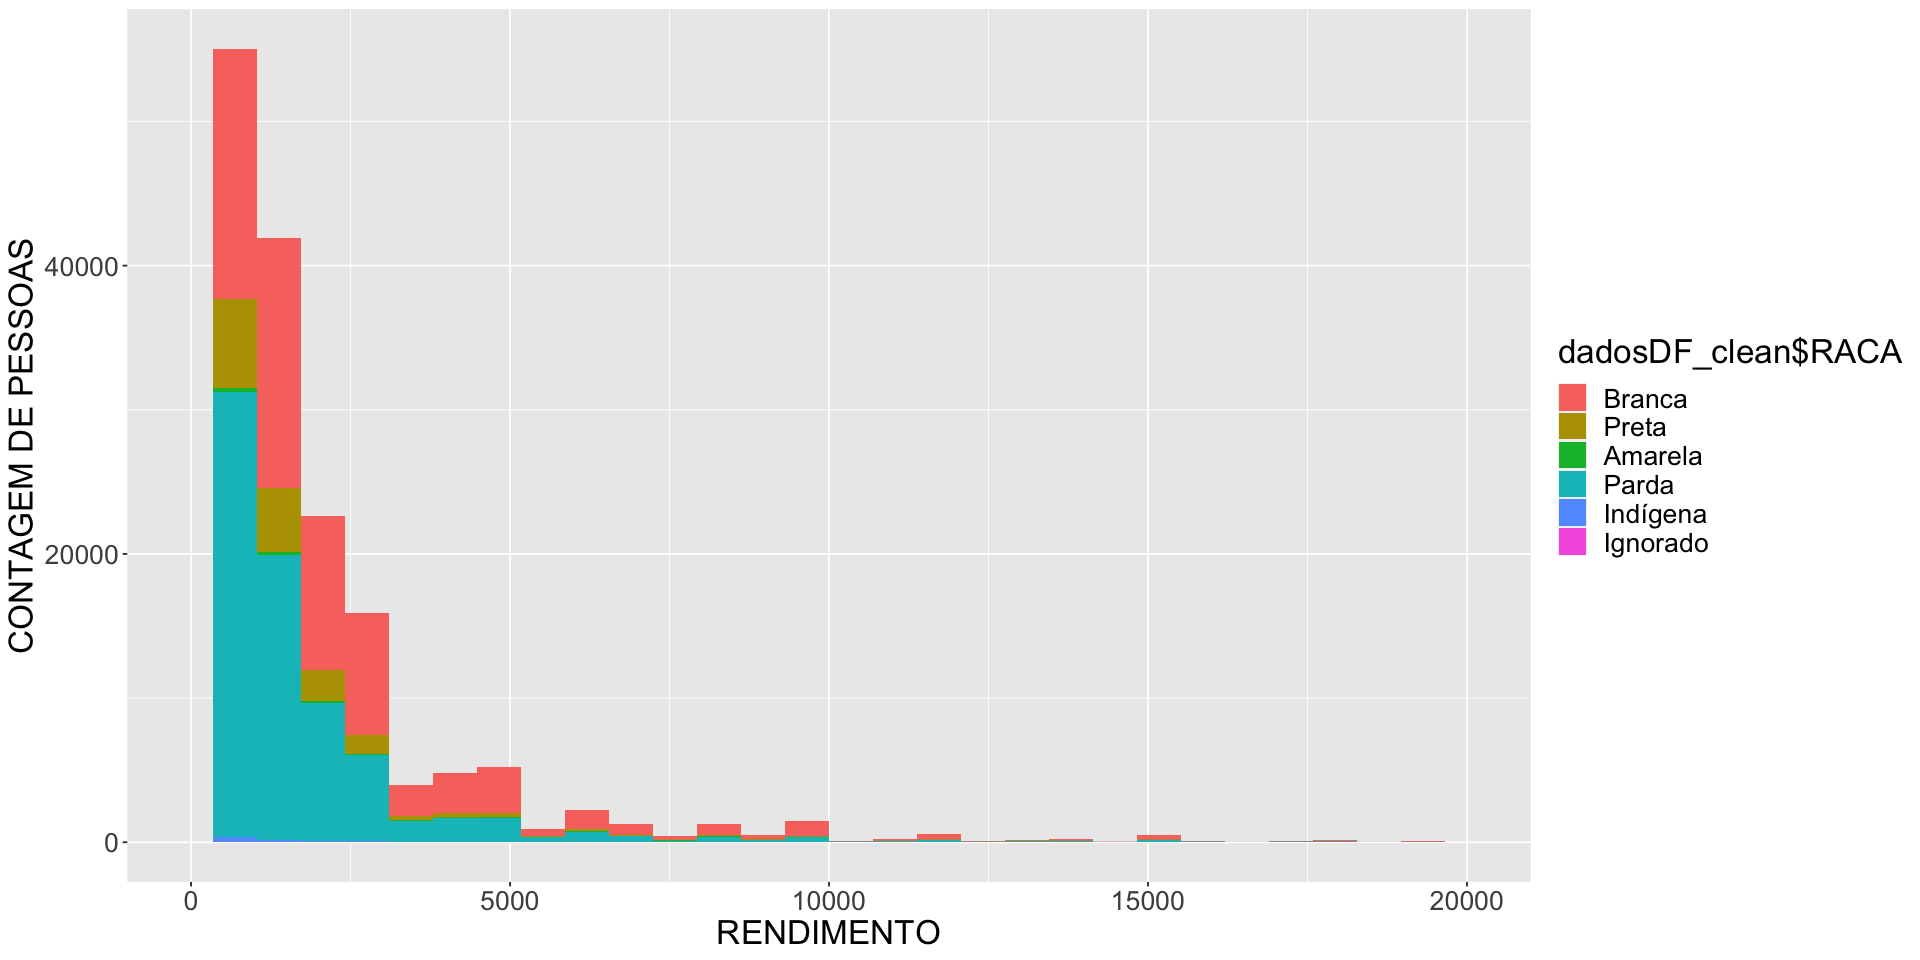

In [67]:
display_html("<h3> Rendimentos por Raca</h3>")
ggplot(dadosDF_clean)+aes(RENDIMENTO)+geom_histogram(aes(fill=dadosDF_clean$RACA))+xlim(0,20000)+ylab("CONTAGEM DE PESSOAS") + 
theme(text = element_text(size = 20))

Rendimentos por Genero

Warning message:
“Use of `dadosDF_clean$GENERO` is discouraged. Use `GENERO` instead.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 923 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 4 rows containing missing values (geom_bar).”


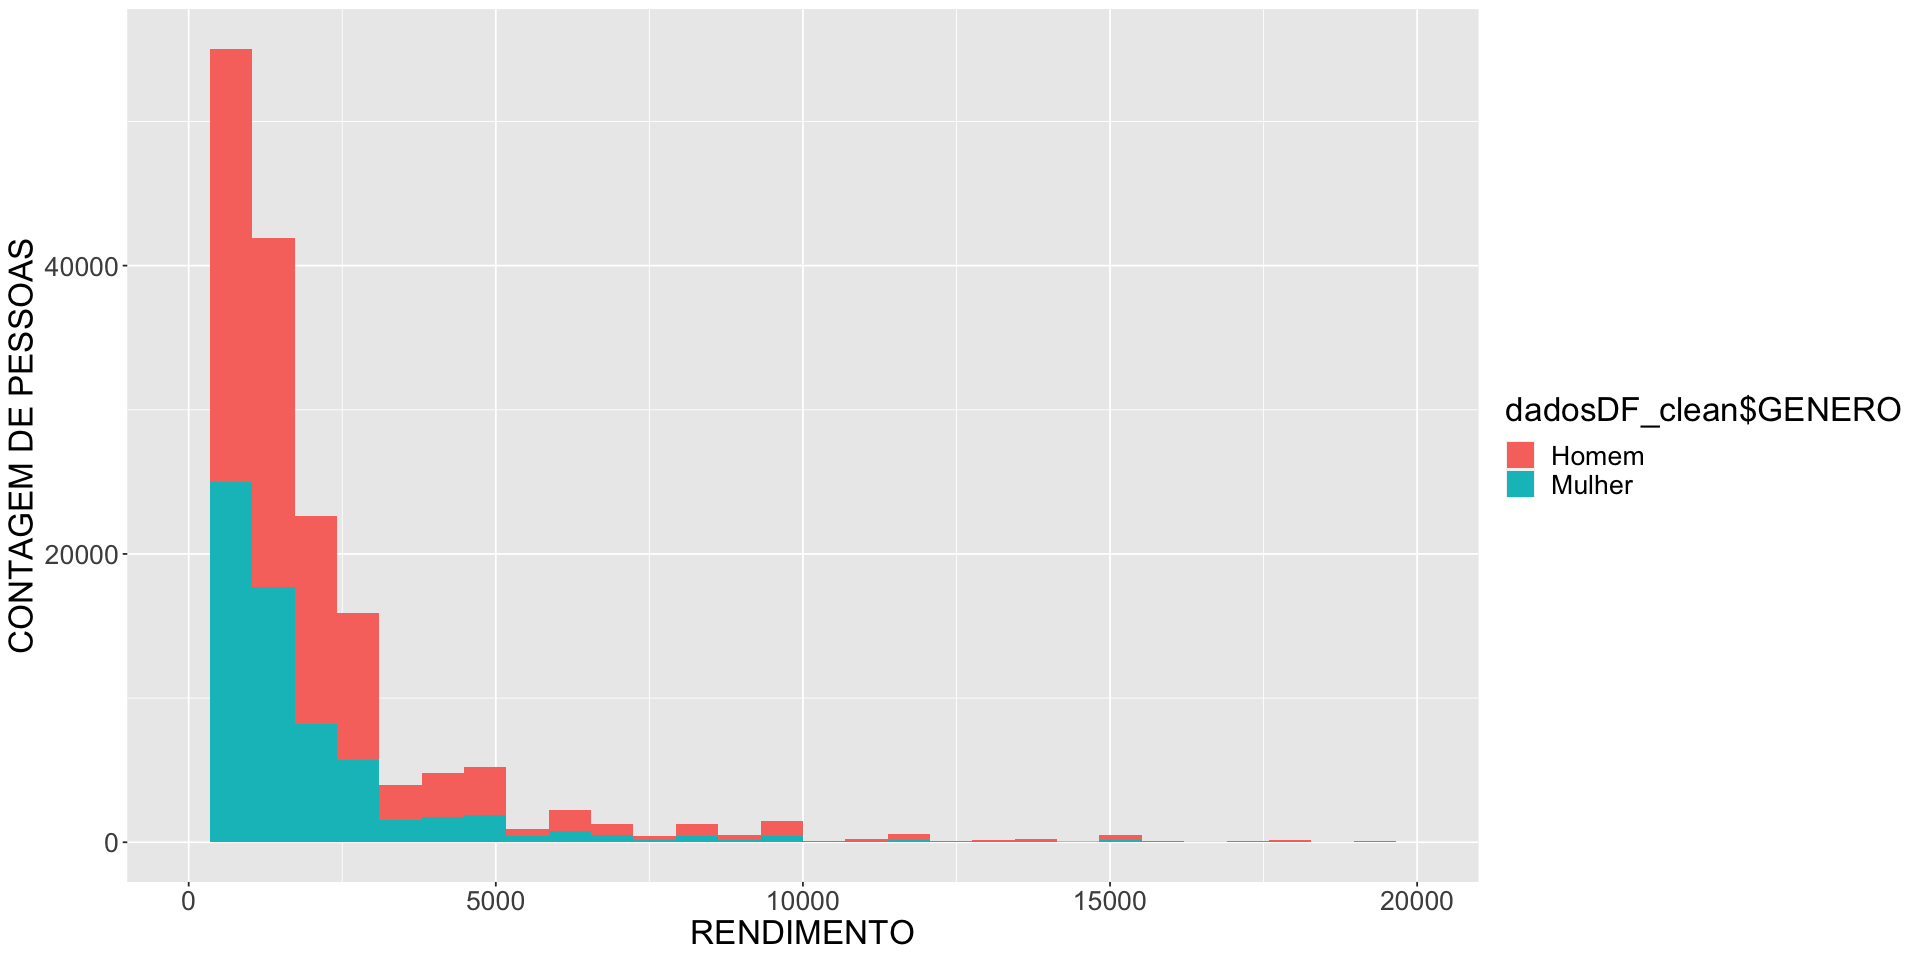

In [68]:
display_html("<h3> Rendimentos por Genero</h3>")
ggplot(dadosDF_clean)+aes(RENDIMENTO)+geom_histogram(aes(fill=dadosDF_clean$GENERO))+xlim(0,20000)+ylab("CONTAGEM DE PESSOAS") + 
theme(text = element_text(size = 20))

In [69]:
##### boxplots mean diference and ztest create a data frame with 2 colums for mulheres e homens